## scipy.rfft

http://paulbourke.net/miscellaneous/dft/

https://en.wikipedia.org/wiki/Euler%27s_formula

https://en.wikipedia.org/wiki/Fast_Fourier_transform

http://docs.scipy.org/doc/scipy/reference/generated/scipy.fftpack.rfft.html#scipy.fftpack.rfft

In [2]:
import numpy as np
import scipy.fftpack as fftpack
import pylab as pl
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

In [3]:
x = np.linspace(0, 2*np.pi, num=50)

signal = np.sin(x)

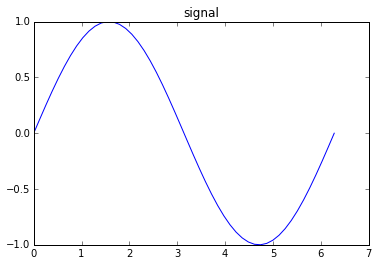

In [4]:
pl.title('signal')
pl.plot(x, signal)

[ -0.        1.5528  -24.68105  -0.08656   0.68518  -0.0724    0.37955
  -0.06848   0.26673  -0.06681   0.20562  -0.06594   0.16654  -0.06542
   0.13902  -0.06509   0.1184   -0.06487   0.10221  -0.06471   0.08906
  -0.06459   0.07808  -0.0645    0.06869  -0.06444   0.06051  -0.06438
   0.05326  -0.06434   0.04675  -0.06431   0.04081  -0.06428   0.03534
  -0.06426   0.03024  -0.06424   0.02544  -0.06423   0.02087  -0.06422
   0.01649  -0.06421   0.01225  -0.06421   0.00811  -0.0642    0.00404
  -0.0642 ]


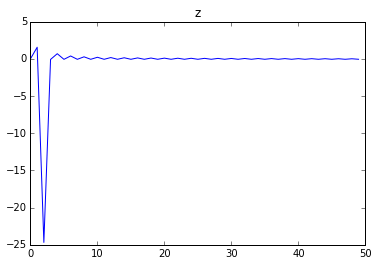

In [5]:
pl.title('z')
z = fftpack.rfft(signal)
pl.plot(z)
print z

## Re-implementing a FFT and inverse FFT

Euler's formula :

$$e^{ix} = cosx + isin(x)$$

http://docs.scipy.org/doc/scipy-dev/reference/tutorial/fftpack.html

FFT : Given a serie $X_0 ... X_{N-1}$

The FFT $y[k]$ is defined as :
$$y_k = \sum_{n=0}^{N-1} x_n e^{-i2\pi k \frac{n}{N}}$$

And the inverse transform is defined as

$$x_n = \frac{1}{N} \sum_{n=0}^{N-1} y_k e^{i2\pi k \frac{n}{N}}$$

(note the sign change in the exponent)

both for $k = 0... N-1$

The $\frac{1}{N}$ can also be put in the forward transform.

In [6]:
# -- Forward transforms
def my_yk(x, k, N):
    y_real = 0.
    y_imag = 0.
    for n in range(0, N):
        # remember e^ix = cosx + i sinx
        y_real += x[n] * np.cos(-2. * np.pi * k * n/float(N))
        y_imag += x[n] * np.sin(-2. * np.pi * k * n/float(N))
    return y_real, y_imag

def my_fft(x):
    N = len(x)
    y_real = np.zeros(N, dtype=np.float)
    y_imag = np.zeros(N, dtype=np.float)
    for k in xrange(0, N):
        y_real[k], y_imag[k] = my_yk(x, k, N)
    return y_real, y_imag


y_real, y_imag = my_fft(signal)
z = fftpack.rfft(signal)

print 'Real parts :'
print "scipy : ", z[0], z[1::2]
print "my    : ", y_real[0], y_real[1:]

print 'Imag parts :'
print "scipy : ", z[2::2]
print "my    : ", y_imag[1:]



Real parts :
scipy :  -6.10622663544e-16 [ 1.5528  -0.08656 -0.0724  -0.06848 -0.06681 -0.06594 -0.06542 -0.06509
 -0.06487 -0.06471 -0.06459 -0.0645  -0.06444 -0.06438 -0.06434 -0.06431
 -0.06428 -0.06426 -0.06424 -0.06423 -0.06422 -0.06421 -0.06421 -0.0642
 -0.0642 ]
my    :  2.14205014311e-15 [ 1.5528  -0.08656 -0.0724  -0.06848 -0.06681 -0.06594 -0.06542 -0.06509
 -0.06487 -0.06471 -0.06459 -0.0645  -0.06444 -0.06438 -0.06434 -0.06431
 -0.06428 -0.06426 -0.06424 -0.06423 -0.06422 -0.06421 -0.06421 -0.0642
 -0.0642  -0.0642  -0.06421 -0.06421 -0.06422 -0.06423 -0.06424 -0.06426
 -0.06428 -0.06431 -0.06434 -0.06438 -0.06444 -0.0645  -0.06459 -0.06471
 -0.06487 -0.06509 -0.06542 -0.06594 -0.06681 -0.06848 -0.0724  -0.08656
  1.5528 ]
Imag parts :
scipy :  [-24.68105   0.68518   0.37955   0.26673   0.20562   0.16654   0.13902
   0.1184    0.10221   0.08906   0.07808   0.06869   0.06051   0.05326
   0.04675   0.04081   0.03534   0.03024   0.02544   0.02087   0.01649
   0.01225   0.00811

--ours
[ 0.       0.12788  0.25365  0.37527  0.49072  0.59811  0.69568  0.78183
  0.85514  0.91441  0.95867  0.98718  0.99949  0.99538  0.97493  0.93847
  0.8866   0.82017  0.74028  0.64823  0.54553  0.43388  0.31511  0.19116
  0.06407 -0.06407 -0.19116 -0.31511 -0.43388 -0.54553 -0.64823 -0.74028
 -0.82017 -0.8866  -0.93847 -0.97493 -0.99538 -0.99949 -0.98718 -0.95867
 -0.91441 -0.85514 -0.78183 -0.69568 -0.59811 -0.49072 -0.37527 -0.25365
 -0.12788 -0.     ]
[-0.       0.12788  0.25365  0.37527  0.49072  0.59811  0.69568  0.78183
  0.85514  0.91441  0.95867  0.98718  0.99949  0.99538  0.97493  0.93847
  0.8866   0.82017  0.74028  0.64823  0.54553  0.43388  0.31511  0.19116
  0.06407 -0.06407 -0.19116 -0.31511 -0.43388 -0.54553 -0.64823 -0.74028
 -0.82017 -0.8866  -0.93847 -0.97493 -0.99538 -0.99949 -0.98718 -0.95867
 -0.91441 -0.85514 -0.78183 -0.69568 -0.59811 -0.49072 -0.37527 -0.25365
 -0.12788  0.     ]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0. -0.
  0.

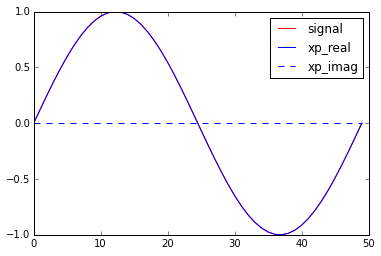

In [7]:
def complex_mul(a_real, a_imag, b_real, b_imag):
    """
    Returns a * b with a, b complex numbers.
    Returns :
        real: real(a*b)
        imag: imag(a*b)
    """
    return a_real * b_real - a_imag * b_imag, \
           a_imag * b_real + a_real * b_imag

# -- Reverse transforms
def my_xn(y_real, y_imag, n, N):
    xn_real = 0.
    xn_imag = 0.
    
    for k in range(0, N):
        # remember e^ix = cosx + i sinx
        e_real = np.cos(2. * np.pi * k * n/float(N))
        e_imag = np.sin(2. * np.pi * k * n/float(N))
        # compute y * e^i... where y is complex and e too
        m_real, m_imag = complex_mul(e_real, e_imag, y_real[k], y_imag[k])
        xn_real += m_real
        xn_imag += m_imag
    xn_real *= 1./float(N)
    xn_imag *= 1./float(N)
    return xn_real, xn_imag

def my_ifft(y_real, y_imag):
    N = len(y_real)
    x_real = np.zeros(N)
    x_imag = np.zeros(N)
    for n in xrange(0, N):
        x_real[n], x_imag[n] = my_xn(y_real, y_imag, n, N)
    return x_real, x_imag

if False:
    z = fftpack.rfft(signal)
    xr = fftpack.irfft(z)
    print '--scipy'
    print signal
    print xr


y_real, y_imag = my_fft(signal)
xp_real, xp_imag = my_ifft(y_real, y_imag)

print '--ours'
print signal
print xp_real
print xp_imag

pl.plot(signal, c='r', label='signal')
pl.plot(xp_real, c='b', label='xp_real')
pl.plot(xp_imag, '--', c='b', label='xp_imag')
pl.legend()

## Simple sine

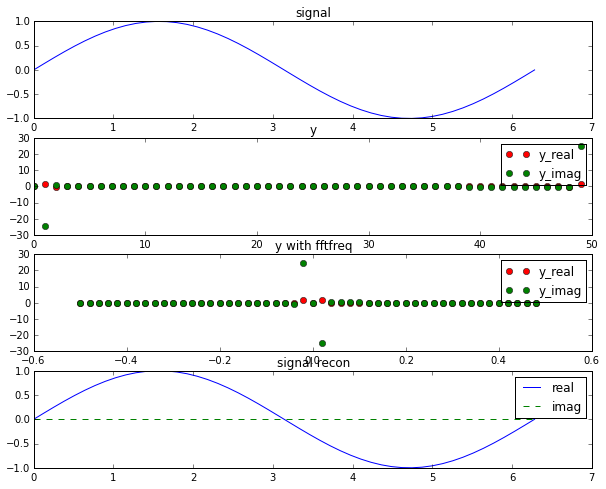

In [8]:
N = 50
x = np.linspace(0, 2*np.pi, num=N)
signal = np.sin(x)
y_real, y_imag = my_fft(signal)
sp_real, sp_imag = my_ifft(y_real, y_imag)


pl.figure(figsize=(10, 8))
pl.subplot(411)
pl.title('signal')
pl.plot(x, signal)

pl.subplot(412)
pl.title('y')
pl.plot(y_real, 'o', c='r', label='y_real')
pl.plot(y_imag, 'o', c='g', label='y_imag')
pl.legend()

pl.subplot(413)
pl.title('y with fftfreq')
pl.plot(fftpack.fftfreq(N), y_real, 'o', c='r', label='y_real')
pl.plot(fftpack.fftfreq(N), y_imag, 'o', c='g', label='y_imag')
pl.legend()

pl.subplot(414)
pl.title('signal recon')
pl.plot(x, sp_real, label='real')
pl.plot(x, sp_imag, '--', label='imag')
pl.legend()

## Dephased sine

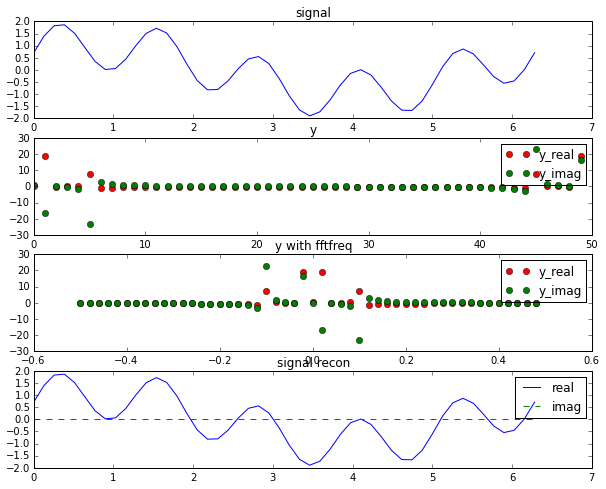

In [9]:
N = 50
x = np.linspace(0, 2*np.pi, num=N)
signal = np.sin(x + np.pi/4) + np.sin(5*x)
y_real, y_imag = my_fft(signal)
sp_real, sp_imag = my_ifft(y_real, y_imag)

pl.figure(figsize=(10, 8))
pl.subplot(411)
pl.title('signal')
pl.plot(x, signal)

pl.subplot(412)
pl.title('y')
pl.plot(y_real, 'o', c='r', label='y_real')
pl.plot(y_imag, 'o', c='g', label='y_imag')
pl.legend()

pl.subplot(413)
pl.title('y with fftfreq')
pl.plot(fftpack.fftfreq(N), y_real, 'o', c='r', label='y_real')
pl.plot(fftpack.fftfreq(N), y_imag, 'o', c='g', label='y_imag')
pl.legend()

pl.subplot(414)
pl.title('signal recon')
pl.plot(x, sp_real, label='real')
pl.plot(x, sp_imag, '--', label='imag')
pl.legend()

So it seems it's the y_real that gives the phase

## Computing the amplitude and phase

The amplitude is $||y(k)||$ and the phase $tan^{-1}\frac{imag(y(k))}{real(y(k))}$

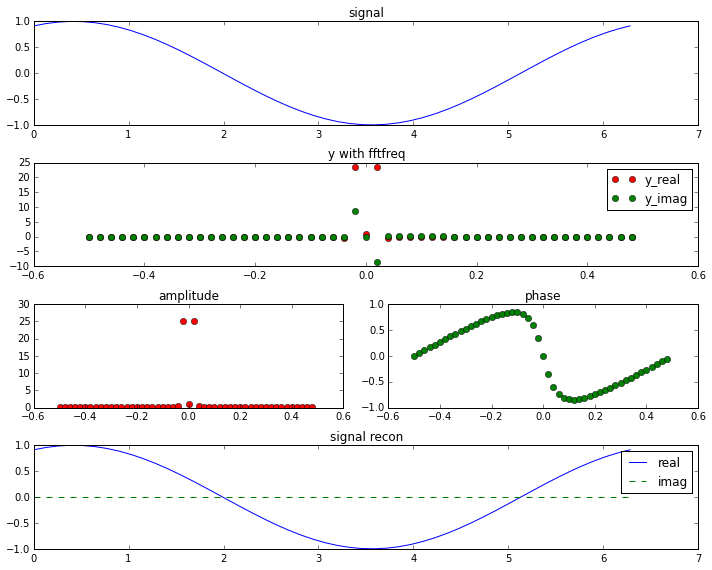

In [17]:
N = 50
x = np.linspace(0, 2*np.pi, num=N)
signal = np.sin(x + 20)
y_real, y_imag = my_fft(signal)
sp_real, sp_imag = my_ifft(y_real, y_imag)

amplitude = np.sqrt(y_real * y_real + y_imag * y_imag)
phase = np.arctan(y_imag / y_real)
phase[np.abs(y_real) < 0.01] = 0

pl.figure(figsize=(10, 8))
pl.subplot2grid((4, 2), (0, 0), colspan=2)
pl.title('signal')
pl.plot(x, signal)

pl.subplot2grid((4, 2), (1, 0), colspan=2)
pl.title('y with fftfreq')
pl.plot(fftpack.fftfreq(N), y_real, 'o', c='r', label='y_real')
pl.plot(fftpack.fftfreq(N), y_imag, 'o', c='g', label='y_imag')
pl.legend()

pl.subplot2grid((4, 2), (2, 0))
pl.title('amplitude')
pl.plot(fftpack.fftfreq(N), amplitude, 'o', c='r', label='amplitude')

pl.subplot2grid((4, 2), (2, 1))
pl.title('phase')
pl.plot(fftpack.fftfreq(N), phase, 'o', c='g', label='phase')

pl.subplot2grid((4, 2), (3, 0), colspan=2)
pl.title('signal recon')
pl.plot(x, sp_real, label='real')
pl.plot(x, sp_imag, '--', label='imag')
pl.legend()
pl.tight_layout()

The difference between our implementation and rfft is that we compute the full fft as if our signal was a complex number (but with imag = 0). That is why we get symmetries in *y_imag*.

## With fftpack

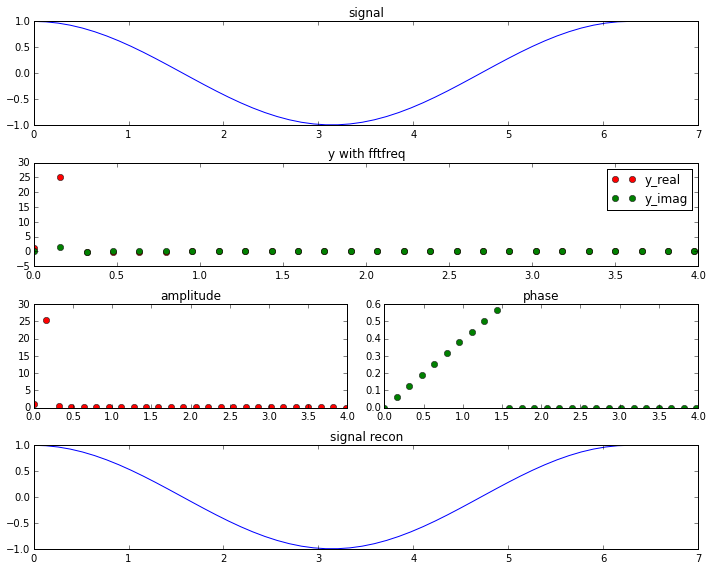

In [16]:
N = 50
x = np.linspace(0, 2*np.pi, num=N)
#signal = np.sin(2*np.pi*x)
signal = np.sin(x + np.pi/2)
z = fftpack.rfft(signal)
sp = fftpack.irfft(z)

freqs = fftpack.rfftfreq(N, d = 2*np.pi/float(N))

# indices of real and imag coefficients in z
real_idx = np.r_[[0], range(1, N, 2)]
imag_idx = range(2, N, 2)

assert N%2 == 0
# when N is even, imag(n/2) is zero and is not included in z
z_real = np.r_[z[0], z[1::2]]
z_imag = np.r_[0, z[2::2], 0]

real_freqs = np.r_[freqs[0], freqs[1::2]]
imag_freqs = np.r_[freqs[0], freqs[2::2], freqs[-1]]

amplitude = np.sqrt(z_real * z_real + z_imag * z_imag)
phase = np.arctan(z_imag / z_real)
phase[np.abs(z_real) < 0.01] = 0 # division by zero

pl.figure(figsize=(10, 8))
pl.subplot2grid((4, 2), (0, 0), colspan=2)
pl.title('signal')
pl.plot(x, signal)

pl.subplot2grid((4, 2), (1, 0), colspan=2)
pl.title('y with fftfreq')
pl.plot(real_freqs, z_real, 'o', c='r', label='y_real')
pl.plot(imag_freqs, z_imag, 'o', c='g', label='y_imag')
pl.legend()

pl.subplot2grid((4, 2), (2, 0))
pl.title('amplitude')
pl.plot(real_freqs, amplitude, 'o', c='r', label='amplitude')

pl.subplot2grid((4, 2), (2, 1))
pl.title('phase')
pl.plot(real_freqs, phase, 'o', c='g', label='phase')

pl.subplot2grid((4, 2), (3, 0), colspan=2)
pl.title('signal recon')
pl.plot(x, sp)
pl.tight_layout()

## Interactive version

In [12]:
from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets

:0: FutureWarning: IPython widgets are experimental and may change in the future.


<function __main__.plot>

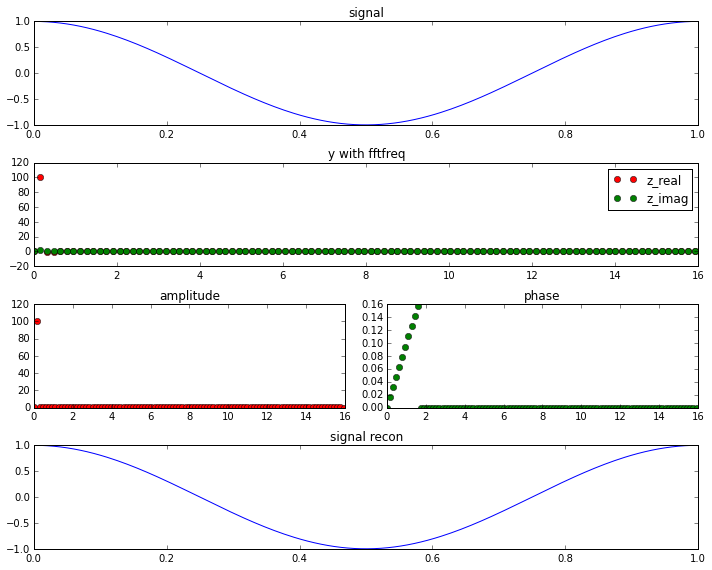

In [15]:
def plot(amplitude=1, frequency=1, phase=np.pi/2.0):
    N = 200
    t = np.linspace(0, 1, num=N)
    signal = amplitude * np.sin(2 * np.pi * frequency * t + phase)
    z = fftpack.rfft(signal)
    sp = fftpack.irfft(z)

    freqs = fftpack.rfftfreq(N, d = 2*np.pi/float(N))

    # indices of real and imag coefficients in z
    real_idx = np.r_[[0], range(1, N, 2)]
    imag_idx = range(2, N, 2)

    assert N%2 == 0
    # when N is even, imag(n/2) is zero and is not included in z
    z_real = np.r_[z[0], z[1::2]]
    z_imag = np.r_[0, z[2::2], 0]

    real_freqs = np.r_[freqs[0], freqs[1::2]]
    imag_freqs = np.r_[freqs[0], freqs[2::2], freqs[-1]]

    amplitude = np.sqrt(z_real * z_real + z_imag * z_imag)
    phase = np.arctan(z_imag / z_real)
    phase[np.abs(z_real) < 0.01] = 0 # division by zero

    pl.figure(figsize=(10, 8))
    pl.subplot2grid((4, 2), (0, 0), colspan=2)
    pl.title('signal')
    pl.plot(t, signal)

    pl.subplot2grid((4, 2), (1, 0), colspan=2)
    pl.title('y with fftfreq')
    pl.plot(real_freqs, z_real, 'o', c='r', label='z_real')
    pl.plot(imag_freqs, z_imag, 'o', c='g', label='z_imag')
    pl.legend()

    pl.subplot2grid((4, 2), (2, 0))
    pl.title('amplitude')
    pl.plot(real_freqs, amplitude, 'o', c='r', label='amplitude')

    pl.subplot2grid((4, 2), (2, 1))
    pl.title('phase')
    pl.plot(real_freqs, phase, 'o', c='g', label='phase')

    pl.subplot2grid((4, 2), (3, 0), colspan=2)
    pl.title('signal recon')
    pl.plot(t, sp)
    pl.tight_layout()
    
interact(plot, amplitude=(0.0, 5.0, 0.1), frequency=(0.0, 5.0, 0.1), phase=(0.0, 5.0, 0.1))